
# Project: Investigating A Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are going to analyse the movies database which has more than 10,000 movies to answer some of our questions. 


<b>Questions to Explore:</b>

<ul style="list-style-type:disc">
  <li>Movie revenue for each year</li>
  <li>Finding mean, max & average income for each year</li>
  <li>Most number of movies released month</li>
  <li>Top 10 movie actor/actors</li>
</ul> 

Importing all the necessary Library's in this section

In [29]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
#import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we are going to check the fields that are needed for our analysis and verify if any clean up required. Let's take an in-depth look at our data.
### General Properties

In [3]:
#root path where we have stored our DataSet
DIR='/Study/Udacity/Projects/MovieDB/'
#DIR='/Users/abdulr06/Desktop/Notes/'
file_name='tmdb-movies.csv'

df_tmdb=pd.read_csv(file_name)
df_tmdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking the datatype of each field before we begin our analysis

In [261]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Describe the dataset

In [262]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning.

For some of our analysis, we require release month to stored in the separate column, so let us use the following code to save it.


In [44]:
#Code to convert to date fomart
df_tmdb['release_date']=pd.to_datetime(df_tmdb['release_date'])

#Code to extract the month information and store it in a seperate column
df_tmdb['release_month'] = df_tmdb['release_date'].apply(lambda x:x.strftime('%b'))

#From the command df_tmdb.info() we noticed that the field 'Cast' has 76 missing values. Lets crosscheck if it has any null values
df_tmdb['cast'].isnull().sum() 
    

76

In [50]:
#The field 'cast' has total 76 null values so lets tag all null values to 'Unknown' bucket. 
df_tmdb.cast.replace(np.NaN, 'Unknown', inplace=True)

#Verify the results. 
df_tmdb[df_tmdb['cast']=='Unknown']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,Unknown,NaN,Sanjay Patel,NaN,...,7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,2015,0.000000e+00,0.000000e+00,Nov
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,Unknown,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,2015-10-09,37,8.2,2015,0.000000e+00,0.000000e+00,Oct
465,321109,tt4393514,0.201696,0,0,Bitter Lake,Unknown,NaN,Adam Curtis,NaN,...,135,Documentary,BBC,2015-01-24,19,7.8,2015,0.000000e+00,0.000000e+00,Jan
536,333350,tt3762974,0.122543,0,0,A Faster Horse,Unknown,NaN,David Gelb,NaN,...,90,Documentary,NaN,2015-10-08,12,8.0,2015,0.000000e+00,0.000000e+00,Oct
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,Unknown,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,88,Documentary,NaN,2015-01-01,11,8.9,2015,0.000000e+00,0.000000e+00,Jan
587,319091,tt4185572,0.062536,0,0,The Hunting Ground,Unknown,NaN,Kirby Dick,NaN,...,103,Documentary,NaN,2015-02-27,39,7.8,2015,0.000000e+00,0.000000e+00,Feb
600,332479,tt4550996,0.047256,0,0,Star Wars: TIE Fighter,Unknown,https://www.youtube.com/watch?v=PN_CP4SuoTU,Paul Johnson,"star wars, Tie Fighter, anime",...,7,Science Fiction|Action|Animation,NaN,2015-03-24,29,7.6,2015,0.000000e+00,0.000000e+00,Mar
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,Unknown,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0.000000e+00,0.000000e+00,Oct
1088,169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,Unknown,http://www.vivianmaier.com/film-finding-vivian...,John Maloof|Charlie Siskel,NaN,...,83,Documentary,NaN,2014-03-28,70,7.8,2014,0.000000e+00,1.384967e+06,Mar
1173,261041,tt3576038,0.159037,0,0,The Search for General Tso,Unknown,NaN,Ian Cheney,NaN,...,71,Documentary,NaN,2014-04-20,14,6.9,2014,0.000000e+00,0.000000e+00,Apr


Now we have successfully identified and replaced all the null values in the Cast field. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. Movie Revenue by YEAR

Let us find out how the movie industry is performing concerning revenue over a period.

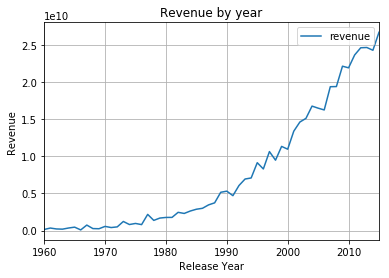

In [22]:
#this code perform group by release_year & taking sum of revenue by year
rev_by_year=df_tmdb.groupby('release_year').agg({'revenue':np.sum})

#resetting index 
rev_by_year = rev_by_year.reset_index()
#sorting by release year
rev_by_year.sort_values('release_year', ascending=True, inplace=True)
#plotting the graph
rev_by_year.plot(x='release_year', y='revenue',kind='line', grid="on")
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Revenue by year')

In the above analysis, it is evident that movie industry growth is health year by year and it continues making good revenue each year. You can see from this Line graph that movies that produced in 2015 generated more revenue and its one of the most successful year for the film industry.

### Research Question 2  - Max, Min & Mean Revenue by YEAR

In this section lets see movie Max, min & mean average 

In [ ]:
#since we dont have revenue information for all the records. Im dropping the records which has 0 revenue value. 
df_tmdb_stat=df_tmdb[~df_tmdb['revenue'].isin([0])]

#selecting only the columns that needs for our analysis
df_tmdb_stat=df_tmdb_stat[['release_year','revenue']]

#using below method to calculate mean, max and  min revenue and storing it in a seperate variable
df_stat_mean=df_tmdb_stat.groupby('release_year').agg({'revenue':np.mean})
df_stat_max=df_tmdb_stat.groupby('release_year').agg({'revenue':np.max})
df_stat_min=df_tmdb_stat.groupby('release_year').agg({'revenue':np.min})

# RESETTING THE INDEX FOR ALL THE DATAFRAMES
df_stat_max = df_stat_max.reset_index()
df_stat_min = df_stat_min.reset_index()
df_stat_mean = df_stat_mean.reset_index()

#PLOTTING THE GRAPH 
df_stat_max.plot(x='release_year', y='revenue',kind='line', grid="on")


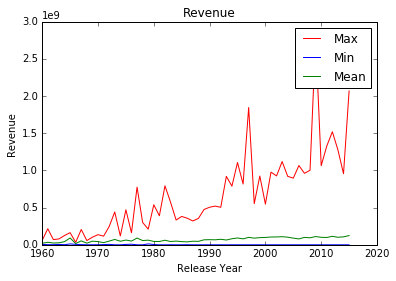

In [160]:
#Lets plot all the three values in the same graph

plt.plot(df_stat_max['release_year'], df_stat_max['revenue'], label='Max', color='r')
plt.plot(df_stat_min['release_year'], df_stat_min['revenue'], label='Min', color='b')
plt.plot(df_stat_mean['release_year'], df_stat_mean['revenue'], label='Mean', color='g')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Revenue')
plt.legend()
plt.show()

### Research Question 3  - Movie release by Month

Let's find out in which particular month the film industry released the most number of movies.

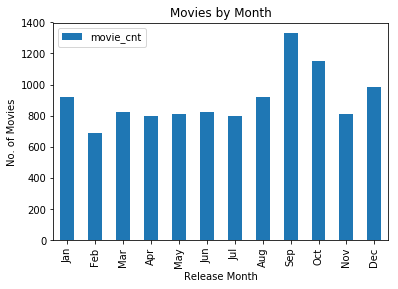

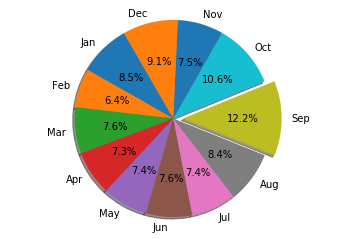

In [20]:
#Performing aggregation to find the total movie count by Month
release_by_month=df_tmdb.groupby(['release_month']).agg({'id':np.size})

#print(release_by_month)

#reassigning index to sort by Month
release_by_month.index = pd.CategoricalIndex(release_by_month.index, 
                               categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], 
                               sorted=True)

#sorting by Month
release_by_month.sort_index(inplace=True)

release_by_month.rename(columns={'id':'movie_cnt'}, inplace=True)                       
                        

#plotting the Graph
release_by_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('No. of Movies')
plt.title('Movies by Month')
plt.show()

#Lets look at the data from a different angel
release_by_month.reset_index(inplace=True)

#This helps to highlight the slices e.g. Sep in our case
explode = (0, 0, 0, 0,0,0,0,0,0.1,0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(release_by_month['movie_cnt'], explode=explode, labels=release_by_month['release_month'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


We can see that in the month of September the film industry released the most number of movies.  

### Research Question 4  - Most popular Actor/Actors

Let's find out which actor/actors acted the most number of movies. 

During our data clean up we have noticed that cast column has 76 null values and it may affect our report if we have unknown values. Hence I'm filtering out all 'Unknown' records. 

In [131]:
#Lets select the columns that are needed for our analysis
df_tmdb.head()

df_cast=df_tmdb[['id', 'cast','release_year']]

#Following code filter all 'Unknown' cast rows
df_cast=df_tmdb[~df_tmdb['cast'].isin(['Unknown'])]
df_cast.set_index('id', inplace=True)
print(df_cast[df_cast['cast'] =='Unknown'])

Empty DataFrame
Columns: [imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj, release_month]
Index: []

[0 rows x 21 columns]


C:\Users\Riyazudeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


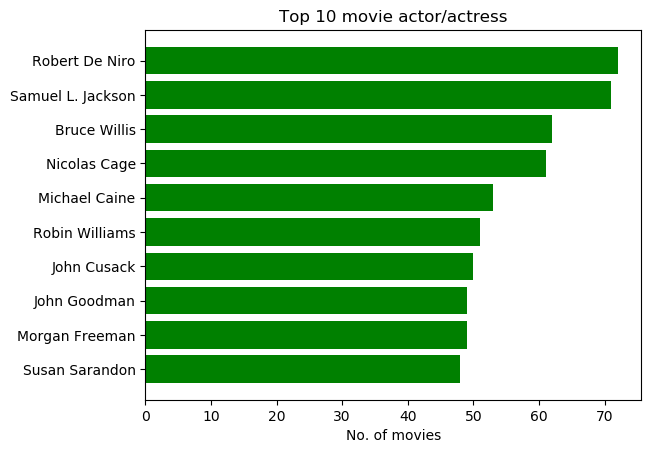

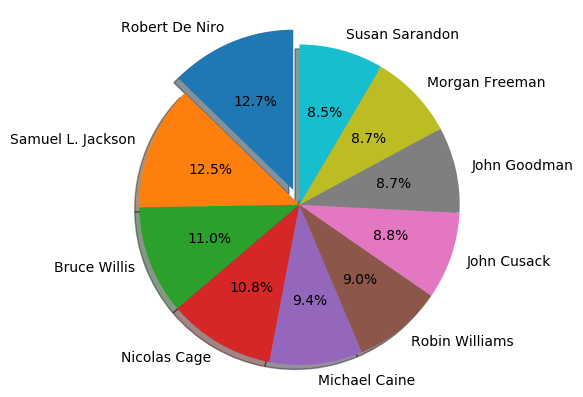

In [133]:
#Below code is used to ignore the datafrm
#df_cast.is_copy = False

#Conveting the cast to List
df_cast['Cast_Split']=df_cast.loc[:,('cast')].apply(lambda x: x.split('|')) 

#Creating additional columns to store the cast details seperartly
act=df_cast['Cast_Split'].apply(pd.Series)

#Renmaing all the columns. 
act=act.rename(columns = lambda x : 'act_' + str(x))

#Restting the index
act.reset_index(inplace=True)


#Taking a count of each column by Cast
act0=act.groupby(['act_0']).agg({'id':np.size})
act1=act.groupby(['act_1']).agg({'id':np.size})
act2=act.groupby(['act_2']).agg({'id':np.size})
act3=act.groupby(['act_3']).agg({'id':np.size})
act4=act.groupby(['act_4']).agg({'id':np.size})

#Concating all the DF's
df=pd.concat([act0,act1,act2,act3,act4])
df.reset_index(inplace=True)

#Now finally we are taking sum of all the values. 
f_new=df.groupby('index').sum()

#Performing sort operation to pick the top values
f_new=f_new[['id']].sort_values('id', ascending=False).head(10)
f_new.reset_index(inplace=True)

#Renaming the columns
f_new.rename(columns={'index':'cast', 'id':'No_of_Movies_acted'}, inplace=True)

# Fixing random state for reproducibility
plt.rcdefaults()
fig, ax = plt.subplots()

people = f_new['cast']
y_pos = np.arange(len(people))
performance = f_new['No_of_Movies_acted']


ax.barh(y_pos, performance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis() 
ax.set_xlabel('No. of movies')
ax.set_title('Top 10 movie actor/actress')

plt.show()

#Lets look at the data from a different angel
f_new.reset_index(inplace=True)

#This helps to highlight the slices e.g. Sep in our case
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(f_new['No_of_Movies_acted'], explode=explode, labels=f_new['cast'] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Our analysis tells that Robert De Niro acted most number of movies and he is one of the top actors on our list. 

<a id='conclusions'></a>
## Conclusions

In the above movie database analysis, we observed that the movie industry business is growing steadily every year and most of the producers like to release their movies in September, and Robert De Niro is one of the top actors in our list.

<b>Limitations:</b>

1) The 'cast' field contains invalid data for 76 records; we could have got better results if we had clean records. 
2) Additional metrics like Screen_Play_Score, Story_line_score, Actor_performance_Score etc.. would help us to analyse the cause of failure/successful movies. 